<h1><center>Fig1 stats

This notebook contains statistical analysis of the data from the figure 1 and its supplemental figures.

# Install libraries

Install necessary libraries to run statistical tests in R.

In [1]:
# Use R in Jupyter Notebook
%load_ext rpy2.ipython

In [2]:
%%R
install.packages("readxl")
install.packages("dplyr")

install.packages("ggplot2")

install.packages("nlme")
install.packages("multcomp")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/readxl_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2056165 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [3]:
%%R
library("readxl")
library("dplyr")

library("ggplot2")

library("nlme")
library("multcomp")

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘nlme’


R[write to console]: The following object is masked from ‘package:dplyr’:

    collapse


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: Loading required package: MASS

R[write to console]: 
Attaching package: ‘MASS’


R[write to console]: The following object is masked from ‘package:dplyr’:

    select


R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




And run function at the end of the notebook.

# Directory

Set directory with the source data. Mount disk if you use Google Colab.

In [6]:
# Mount disk if you use Google Colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [7]:
# Change directory
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/full submission 2/sourcedata

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/full submission 2/sourcedata


# APT Fig1F & SuppFig1C


In [ ]:
%%R
gcamp <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "APT")
gcamp$output = as.factor(gcamp$output)
gcamp$period = as.factor(gcamp$period)
gcamp$auc = as.numeric(gcamp$auc)

In [ ]:
%%R
neworder <- c('baseline','airpuff')
gcamp <- arrange(transform(gcamp, period=factor(period,levels=neworder)),period)
gcamp$period <- factor(gcamp$period, labels=c('baseline','airpuff'))

In [ ]:
%%R
eyfp <- read_excel("fig1-supp1_LH-eYFP.xlsx", sheet = "APT")
eyfp$output = as.factor(eyfp$output)
eyfp$period = as.factor(eyfp$period)
eyfp$auc = as.numeric(eyfp$auc)

In [ ]:
%%R
neworder <- c('baseline','airpuff')
eyfp <- arrange(transform(eyfp, period=factor(period,levels=neworder)),period)
eyfp$period <- factor(eyfp$period, labels=c('baseline','airpuff'))

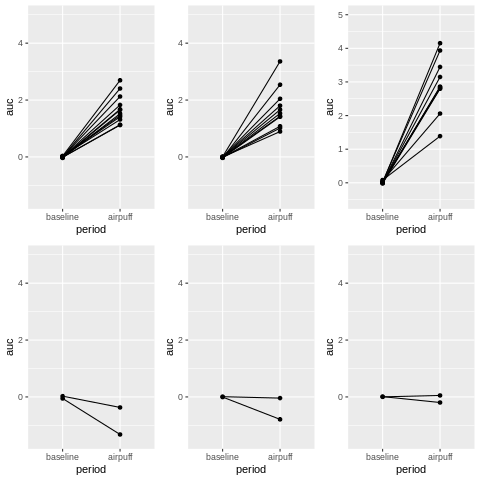

In [ ]:
%%R
p1 <- ggplot(gcamp[(gcamp$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,5)
p2 <- ggplot(eyfp[(eyfp$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,5)
p3 <- ggplot(gcamp[(gcamp$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,5)
p4 <- ggplot(eyfp[(eyfp$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,5)
p5 <- ggplot(gcamp[(gcamp$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(.5-1,5)
p6 <- ggplot(eyfp[(eyfp$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,5)
multiplot(p1,p2,p3,p4,p5,p6, cols=3)

Normality test

In [ ]:
%%R
print("---------------- GCaMP ---------------")
print(c("LHA-DRN baseline", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="baseline"), ]$auc)$p.value))
print(c("LHA-DRN airpuff", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="airpuff"),]$auc)$p.value))

print(c("LHA-VTA baseline", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="baseline"),]$auc)$p.value))
print(c("LHA-VTA airpuff", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="airpuff"),]$auc)$p.value))

print(c("LHA-LHb baseline", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="baseline"),]$auc)$p.value))
print(c("LHA-LHb airpuff", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="airpuff"),]$auc)$p.value))

print("---------------- eYFP ----------------")
print(c("baseline", shapiro.test(eyfp[eyfp$period=="baseline",]$auc)$p.value))
print(c("airpuff", shapiro.test(eyfp[eyfp$period=="airpuff",]$auc)$p.value))

[1] "---------------- GCaMP ---------------"
[1] "LHA-DRN baseline"  "0.418060576367231"
[1] "LHA-DRN airpuff"   "0.280296110728134"
[1] "LHA-VTA baseline" "0.4224215647385" 
[1] "LHA-VTA airpuff"   "0.173458442441156"
[1] "LHA-LHb baseline"   "0.0761732306595741"
[1] "LHA-LHb airpuff"   "0.643483233341294"
[1] "---------------- eYFP ----------------"
[1] "baseline"          "0.124623705196389"
[1] "airpuff"           "0.379391521626777"


$p > 0.5$

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
gcamp["group"] = "GCaMP"
eyfp["group"] = "eYFP"
df <- rbind(gcamp,eyfp)
anova <- aov(auc ~ group*output*period, random=~1|mouse, data=df)
summary(anova)

                    Df Sum Sq Mean Sq F value   Pr(>F)    
group                1  16.19   16.19  72.565 3.13e-12 ***
output               2   5.53    2.77  12.404 2.67e-05 ***
period               1  55.53   55.53 248.899  < 2e-16 ***
group:output         2   0.35    0.18   0.794    0.456    
group:period         1  16.08   16.08  72.061 3.54e-12 ***
output:period        2   5.18    2.59  11.606 4.80e-05 ***
group:output:period  2   0.32    0.16   0.718    0.491    
Residuals           66  14.72    0.22                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = gcamp[gcamp$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = gcamp[gcamp$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = gcamp[gcamp$output=='LHA-LHb',]
lme.model <- lme(auc ~ period, random=~1|mouse, data = lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   1.6923     0.1404   12.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   1.7167     0.2183   7.866 3.77e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step met

In [ ]:
#eYFP
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=eyfp)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = eyfp, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)  
airpuff - baseline == 0  -0.4419     0.2077  -2.128   0.0333 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# SCT Fig1I - SuppFig1F

In [ ]:
%%R
gcamp <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "SCT")
gcamp$output = as.factor(gcamp$output)
gcamp$period = as.factor(gcamp$period)
gcamp$auc = as.numeric(gcamp$auc)

In [ ]:
%%R
neworder <- c('baseline','onset','drinking')
gcamp <- arrange(transform(gcamp, period=factor(period,levels=neworder)),period)
gcamp$period <- factor(gcamp$period, labels=c('baseline','onset','drinking'))

In [ ]:
%%R
eyfp <- read_excel("fig1-supp1_LH-eYFP.xlsx", sheet = "SCT")
eyfp$output = as.factor(eyfp$output)
eyfp$period = as.factor(eyfp$period)
eyfp$auc = as.numeric(eyfp$auc)

In [ ]:
%%R
neworder <- c('baseline','onset','drinking')
eyfp <- arrange(transform(eyfp, period=factor(period,levels=neworder)),period)
eyfp$period <- factor(eyfp$period, labels=c('baseline','onset','drinking'))

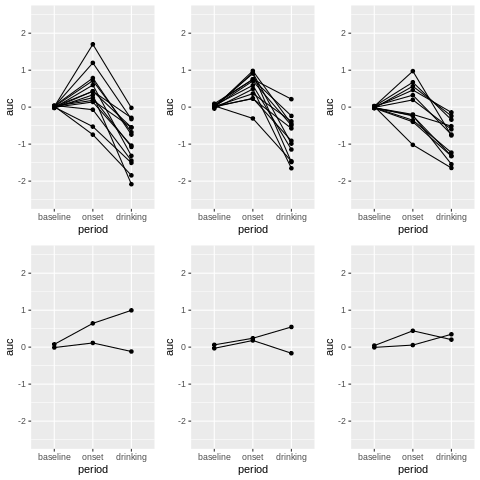

In [ ]:
%%R
p1 <- ggplot(gcamp[(gcamp$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p2 <- ggplot(eyfp[(eyfp$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p3 <- ggplot(gcamp[(gcamp$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p4 <- ggplot(eyfp[(eyfp$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p5 <- ggplot(gcamp[(gcamp$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p6 <- ggplot(eyfp[(eyfp$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
multiplot(p1,p2,p3,p4,p5,p6, cols=3)

Normality test

In [ ]:
%%R
print("---------------- GCaMP ---------------")
print(c("LHA-DRN baseline", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="baseline"), ]$auc)$p.value))
print(c("LHA-DRN onset", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-DRN drinking", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="drinking"),]$auc)$p.value))

print(c("LHA-VTA baseline", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="baseline"),]$auc)$p.value))
print(c("LHA-VTA onset", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-VTA drinking", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="drinking"),]$auc)$p.value))

print(c("LHA-LHb baseline", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="baseline"),]$auc)$p.value))
print(c("LHA-LHb onset", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-LHb drinking", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="drinking"),]$auc)$p.value))

print("---------------- eYFP ----------------")
print(c("baseline", shapiro.test(eyfp[eyfp$period=="baseline",]$auc)$p.value))
print(c("onset", shapiro.test(eyfp[eyfp$period=="onset",]$auc)$p.value))
print(c("drinking", shapiro.test(eyfp[eyfp$period=="drinking",]$auc)$p.value))

[1] "---------------- GCaMP ---------------"
[1] "LHA-DRN baseline"  "0.638380139867139"
[1] "LHA-DRN onset"     "0.910307103029594"
[1] "LHA-DRN drinking"  "0.834627270094983"
[1] "LHA-VTA baseline"  "0.776785788962589"
[1] "LHA-VTA onset"     "0.223846150299267"
[1] "LHA-VTA drinking"  "0.793944787432539"
[1] "LHA-LHb baseline"   "0.0631809013192717"
[1] "LHA-LHb onset"     "0.846893102720771"
[1] "LHA-LHb drinking"  "0.336878665023069"
[1] "---------------- eYFP ----------------"
[1] "baseline"         "0.44706995172397"
[1] "onset"             "0.448852969148718"
[1] "drinking"          "0.687674587471778"


$p > 0.5$

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
gcamp["group"] = "GCaMP"
eyfp["group"] = "eYFP"
df <- rbind(gcamp,eyfp)
anova <- aov(auc ~ group*output*period, random=~1|mouse, data=df)
summary(anova)

                     Df Sum Sq Mean Sq F value  Pr(>F)    
group                 1  2.226   2.226  11.103 0.00116 ** 
output                2  0.542   0.271   1.351 0.26314    
period                2 25.435  12.717  63.437 < 2e-16 ***
group:output          2  0.212   0.106   0.528 0.59096    
group:period          2  5.026   2.513  12.535 1.2e-05 ***
output:period         4  0.828   0.207   1.033 0.39338    
group:output:period   4  0.183   0.046   0.229 0.92175    
Residuals           114 22.854   0.200                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = gcamp[gcamp$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = gcamp[gcamp$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = gcamp[gcamp$output=='LHA-LHb',]
lme.model <- lme(auc ~ period, random=~1|mouse, data = lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0      0.3778     0.1533   2.464    0.026 *  
drinking - baseline == 0  -0.9717     0.1533  -6.337 4.68e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0      0.5310     0.1481   3.586 0.000661 ***
drinking - baseline == 0  -0.8193     0.148

In [ ]:
#eYFP
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=eyfp)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = eyfp, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)  
onset - baseline == 0      0.2572     0.1330   1.934   0.0961 .
drinking - baseline == 0   0.2795     0.1330   2.102   0.0654 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# OFT Fig1M & FigSupp1I

In [ ]:
%%R
gcamp <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "OFT")
gcamp$output = as.factor(gcamp$output)
gcamp$period = as.factor(gcamp$period)
gcamp$auc = as.numeric(gcamp$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
gcamp <- arrange(transform(gcamp, period=factor(period,levels=neworder)),period)
gcamp$period <- factor(gcamp$period, labels=c('immobile','preonset','onset','mobile'))

In [ ]:
%%R
eyfp <- read_excel("fig1-supp1_LH-eYFP.xlsx", sheet = "OFT")
eyfp$output = as.factor(eyfp$output)
eyfp$period = as.factor(eyfp$period)
eyfp$auc = as.numeric(eyfp$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
eyfp <- arrange(transform(eyfp, period=factor(period,levels=neworder)),period)
eyfp$period <- factor(eyfp$period, labels=c('immobile','preonset','onset','mobile'))

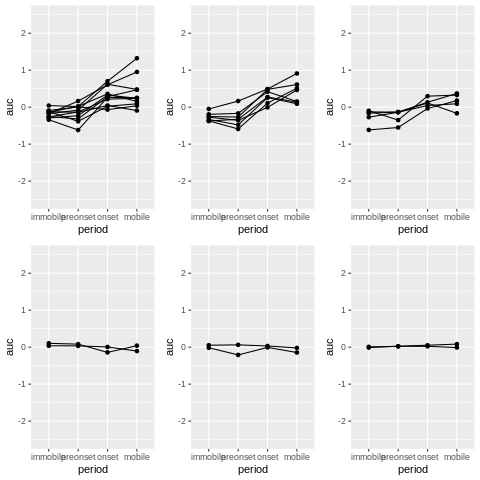

In [ ]:
%%R
p1 <- ggplot(gcamp[(gcamp$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p2 <- ggplot(eyfp[(eyfp$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p3 <- ggplot(gcamp[(gcamp$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p4 <- ggplot(eyfp[(eyfp$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p5 <- ggplot(gcamp[(gcamp$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
p6 <- ggplot(eyfp[(eyfp$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2.5,2.5)
multiplot(p1,p2,p3,p4,p5,p6, cols=3)

Normality test

In [ ]:
%%R
print("---------------- GCaMP ---------------")
print(c("LHA-DRN immobile", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="immobile"), ]$auc)$p.value))
print(c("LHA-DRN preonset", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="preonset"),]$auc)$p.value))
print(c("LHA-DRN onset", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-DRN mobile", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="mobile"),]$auc)$p.value))
print("")
print(c("LHA-VTA immobile", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="immobile"),]$auc)$p.value))
print(c("LHA-VTA preonset", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="preonset"),]$auc)$p.value))
print(c("LHA-VTA onset", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-VTA mobile", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="mobile"),]$auc)$p.value))
print("")
print(c("LHA-LHb immobile", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="immobile"),]$auc)$p.value))
print(c("LHA-LHb preonset", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="preonset"),]$auc)$p.value))
print(c("LHA-LHb onset", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-LHb mobile", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="mobile"),]$auc)$p.value))

print("---------------- eYFP ----------------")
print(c("immobile", shapiro.test(eyfp[eyfp$period=="immobile",]$auc)$p.value))
print(c("preonset", shapiro.test(eyfp[eyfp$period=="preonset",]$auc)$p.value))
print(c("onset", shapiro.test(eyfp[eyfp$period=="onset",]$auc)$p.value))
print(c("mobile", shapiro.test(eyfp[eyfp$period=="mobile",]$auc)$p.value))

[1] "---------------- GCaMP ---------------"
[1] "LHA-DRN immobile"  "0.795403692729759"
[1] "LHA-DRN preonset"  "0.666627844813454"
[1] "LHA-DRN onset"     "0.545651499359147"
[1] "LHA-DRN mobile"     "0.0532590138063385"
[1] ""
[1] "LHA-VTA immobile"  "0.321038902708742"
[1] "LHA-VTA preonset"  "0.648472861098257"
[1] "LHA-VTA onset"     "0.476847708680051"
[1] "LHA-VTA mobile"    "0.380828803816646"
[1] ""
[1] "LHA-LHb immobile"   "0.0789021732911321"
[1] "LHA-LHb preonset"   "0.0552902671736715"
[1] "LHA-LHb onset"     "0.841420032470075"
[1] "LHA-LHb mobile"    "0.603098850313034"
[1] "---------------- eYFP ----------------"
[1] "immobile"          "0.556465591082225"
[1] "preonset"           "0.0061311139893838"
[1] "onset"              "0.0344814529396953"
[1] "mobile"            "0.802172226392132"


GCaMP: $p>0.5$

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
gcamp["group"] = "GCaMP"
eyfp["group"] = "eYFP"
df <- rbind(gcamp,eyfp)
anova <- aov(auc ~ group*output*period, random=~1|mouse, data=df)
summary(anova)

                    Df Sum Sq Mean Sq F value   Pr(>F)    
group                1  0.032  0.0316   0.599    0.441    
output               2  0.221  0.1106   2.092    0.129    
period               3  4.800  1.5999  30.273 1.05e-13 ***
group:output         2  0.103  0.0515   0.975    0.381    
group:period         3  1.469  0.4896   9.264 2.05e-05 ***
output:period        6  0.128  0.0213   0.403    0.875    
group:output:period  6  0.087  0.0145   0.275    0.947    
Residuals           92  4.862  0.0528                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = gcamp[gcamp$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = gcamp[gcamp$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = gcamp[gcamp$output=='LHA-LHb',]
lme.model <- lme(auc ~ period, random=~1|mouse, data = lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0  0.02183    0.09027   0.242     0.99    
onset - immobile == 0     0.48283    0.09027   5.348   <1e-06 ***
mobile - immobile == 0    0.55188    0.09027   6.113   <1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0 -0.02485    0.0849

In [ ]:
#eYFP
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=eyfp)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = eyfp, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)
preonset - immobile == 0   0.1667     4.1654    0.04    1.000
onset - immobile == 0     -2.6667     4.1654   -0.64    0.859
mobile - immobile == 0    -4.1667     4.1654   -1.00    0.624
(Adjusted p values reported -- single-step method)



Mobile score

In [ ]:
%%R
gcamp <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "OFT_mobileScore")
gcamp$period = as.factor(gcamp$period)
gcamp$auc = as.numeric(gcamp$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
gcamp <- arrange(transform(gcamp, period=factor(period,levels=neworder)),period)
gcamp$period <- factor(gcamp$period, labels=c('immobile','preonset','onset','mobile'))

In [ ]:
%%R
eyfp <- read_excel("fig1-supp1_LH-eYFP.xlsx", sheet = "OFT_mobileScore")
eyfp$period = as.factor(eyfp$period)
eyfp$auc = as.numeric(eyfp$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
eyfp <- arrange(transform(eyfp, period=factor(period,levels=neworder)),period)
eyfp$period <- factor(eyfp$period, labels=c('immobile','preonset','onset','mobile'))

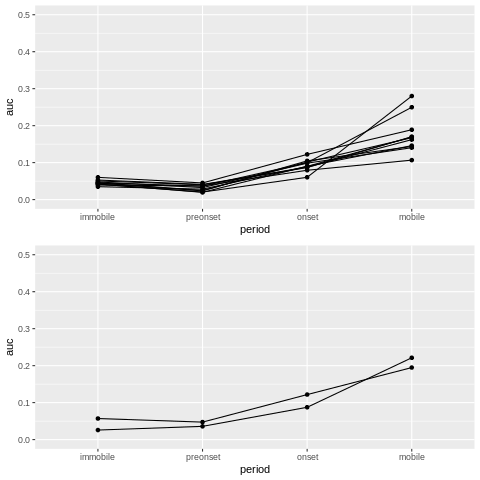

In [ ]:
%%R
p1 <- ggplot(gcamp, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(0,0.5)
p2 <- ggplot(eyfp, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(0,0.5)
multiplot(p1,p2)

Normality test

In [ ]:
%%R
print("---------------- GCaMP ---------------")
print(c("immobile", shapiro.test(gcamp[(gcamp$period=="immobile"), ]$auc)$p.value))
print(c("preonset", shapiro.test(gcamp[(gcamp$period=="preonset"),]$auc)$p.value))
print(c("onset", shapiro.test(gcamp[(gcamp$period=="onset"),]$auc)$p.value))
print(c("mobile", shapiro.test(gcamp[(gcamp$period=="mobile"),]$auc)$p.value))

[1] "---------------- GCaMP ---------------"
[1] "immobile"          "0.894431017122535"
[1] "preonset"          "0.464470154561756"
[1] "onset"             "0.758369212135172"
[1] "mobile"             "0.0979688224246382"


$p > 0.5$

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
gcamp["group"] = "GCaMP"
eyfp["group"] = "eYFP"
df <- rbind(gcamp,eyfp)
anova <- aov(auc ~ group*period, random=~1|mouse, data=df)
summary(anova)

             Df  Sum Sq Mean Sq F value Pr(>F)    
group         1 0.00107 0.00107   1.566  0.217    
period        3 0.17355 0.05785  84.809 <2e-16 ***
group:period  3 0.00122 0.00041   0.597  0.621    
Residuals    44 0.03001 0.00068                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=gcamp)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = gcamp, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0 -0.01423    0.01139  -1.249 0.453173    
onset - immobile == 0     0.04692    0.01139   4.121 0.000131 ***
mobile - immobile == 0    0.12905    0.01139  11.334  < 1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



In [ ]:
#eYFP
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=eyfp)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = eyfp, random = ~1 | 
    mouse)

Linear Hypotheses:
                           Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0 -1.110e-15  1.155e+00   0.000   1.0000    
onset - immobile == 0     3.000e+00  1.155e+00   2.598   0.0256 *  
mobile - immobile == 0    5.000e+00  1.155e+00   4.330   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# TST Fig1P & FigSupp1M

In [ ]:
%%R
gcamp <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "TST")
gcamp$output = as.factor(gcamp$output)
gcamp$period = as.factor(gcamp$period)
gcamp$auc = as.numeric(gcamp$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
gcamp <- arrange(transform(gcamp, period=factor(period,levels=neworder)),period)
gcamp$period <- factor(gcamp$period, labels=c('immobile','preonset','onset','mobile'))

In [ ]:
%%R
eyfp <- read_excel("fig1-supp1_LH-eYFP.xlsx", sheet = "TST")
eyfp$output = as.factor(eyfp$output)
eyfp$period = as.factor(eyfp$period)
eyfp$auc = as.numeric(eyfp$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
eyfp <- arrange(transform(eyfp, period=factor(period,levels=neworder)),period)
eyfp$period <- factor(eyfp$period, labels=c('immobile','preonset','onset','mobile'))

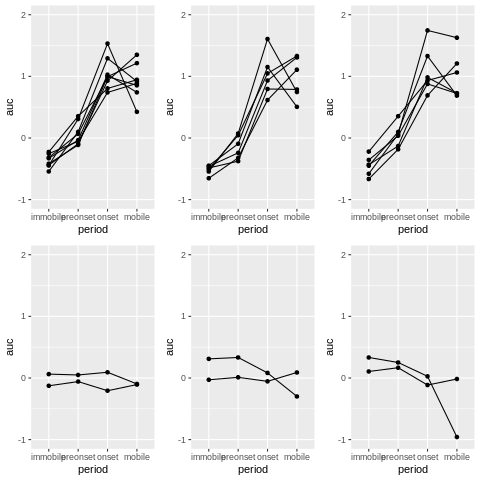

In [ ]:
%%R
p1 <- ggplot(gcamp[(gcamp$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,2)
p2 <- ggplot(eyfp[(eyfp$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,2)
p3 <- ggplot(gcamp[(gcamp$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,2)
p4 <- ggplot(eyfp[(eyfp$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,2)
p5 <- ggplot(gcamp[(gcamp$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,2)
p6 <- ggplot(eyfp[(eyfp$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,2)
multiplot(p1,p2,p3,p4,p5,p6, cols=3)

Normality test

In [ ]:
%%R
print("---------------- GCaMP ---------------")
print(c("LHA-DRN immobile", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="immobile"), ]$auc)$p.value))
print(c("LHA-DRN preonset", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="preonset"),]$auc)$p.value))
print(c("LHA-DRN onset", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-DRN mobile", shapiro.test(gcamp[(gcamp$output=="LHA-DRN" & gcamp$period=="mobile"),]$auc)$p.value))
print("")
print(c("LHA-VTA immobile", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="immobile"),]$auc)$p.value))
print(c("LHA-VTA preonset", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="preonset"),]$auc)$p.value))
print(c("LHA-VTA onset", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-VTA mobile", shapiro.test(gcamp[(gcamp$output=="LHA-VTA" & gcamp$period=="mobile"),]$auc)$p.value))
print("")
print(c("LHA-LHb immobile", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="immobile"),]$auc)$p.value))
print(c("LHA-LHb preonset", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="preonset"),]$auc)$p.value))
print(c("LHA-LHb onset", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="onset"),]$auc)$p.value))
print(c("LHA-LHb mobile", shapiro.test(gcamp[(gcamp$output=="LHA-LHb" & gcamp$period=="mobile"),]$auc)$p.value))

print("---------------- eYFP ----------------")
print(c("immobile", shapiro.test(eyfp[eyfp$period=="immobile",]$auc)$p.value))
print(c("preonset", shapiro.test(eyfp[eyfp$period=="preonset",]$auc)$p.value))
print(c("onset", shapiro.test(eyfp[eyfp$period=="onset",]$auc)$p.value))
print(c("mobile", shapiro.test(eyfp[eyfp$period=="mobile",]$auc)$p.value))

[1] "---------------- GCaMP ---------------"
[1] "LHA-DRN immobile"  "0.752753845977096"
[1] "LHA-DRN preonset"  "0.155649738400565"
[1] "LHA-DRN onset"     "0.327631806703167"
[1] "LHA-DRN mobile"    "0.744987166242646"
[1] ""
[1] "LHA-VTA immobile"  "0.255475624273444"
[1] "LHA-VTA preonset" "0.44301941526295"
[1] "LHA-VTA onset"     "0.795524130850089"
[1] "LHA-VTA mobile"    "0.458596446574544"
[1] ""
[1] "LHA-LHb immobile" "0.95687533724764"
[1] "LHA-LHb preonset"  "0.625507134679822"
[1] "LHA-LHb onset"     "0.378427417733485"
[1] "LHA-LHb mobile"    "0.190882536161675"
[1] "---------------- eYFP ----------------"
[1] "immobile"          "0.579528048581544"
[1] "preonset"          "0.801132248706236"
[1] "onset"             "0.584215589131319"
[1] "mobile"             "0.0523675653559756"


$p > 0.5$

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
gcamp["group"] = "GCaMP"
eyfp["group"] = "eYFP"
df <- rbind(gcamp,eyfp)
anova <- aov(auc ~ group*output*period, random=~1|mouse, data=df)
summary(anova)

                    Df Sum Sq Mean Sq F value   Pr(>F)    
group                1  2.909   2.909  45.148 2.44e-09 ***
output               2  0.044   0.022   0.340    0.713    
period               3 22.119   7.373 114.447  < 2e-16 ***
group:output         2  0.132   0.066   1.027    0.363    
group:period         3 10.470   3.490  54.175  < 2e-16 ***
output:period        6  0.125   0.021   0.323    0.923    
group:output:period  6  0.321   0.053   0.829    0.551    
Residuals           80  5.154   0.064                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = gcamp[gcamp$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = gcamp[gcamp$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = gcamp[gcamp$output=='LHA-LHb',]
lme.model <- lme(auc ~ period, random=~1|mouse, data = lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0   0.4383     0.1090   4.022 0.000181 ***
onset - immobile == 0      1.4111     0.1090  12.948  < 1e-04 ***
mobile - immobile == 0     1.2884     0.1090  11.822  < 1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0   0.3647     0.148

In [ ]:
#eYFP
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=eyfp)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = eyfp, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)  
preonset - immobile == 0  0.01598    0.13329   0.120   0.9988  
onset - immobile == 0    -0.13827    0.13329  -1.037   0.5980  
mobile - immobile == 0   -0.34066    0.13329  -2.556   0.0287 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



Mobile score

In [ ]:
%%R
gcamp <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "TST_mobileScore")
gcamp$period = as.factor(gcamp$period)
gcamp$auc = as.numeric(gcamp$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
gcamp <- arrange(transform(gcamp, period=factor(period,levels=neworder)),period)
gcamp$period <- factor(gcamp$period, labels=c('immobile','preonset','onset','mobile'))

In [ ]:
%%R
eyfp <- read_excel("fig1-supp1_LH-eYFP.xlsx", sheet = "TST_mobileScore")
eyfp$period = as.factor(eyfp$period)
eyfp$auc = as.numeric(eyfp$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
eyfp <- arrange(transform(eyfp, period=factor(period,levels=neworder)),period)
eyfp$period <- factor(eyfp$period, labels=c('immobile','preonset','onset','mobile'))

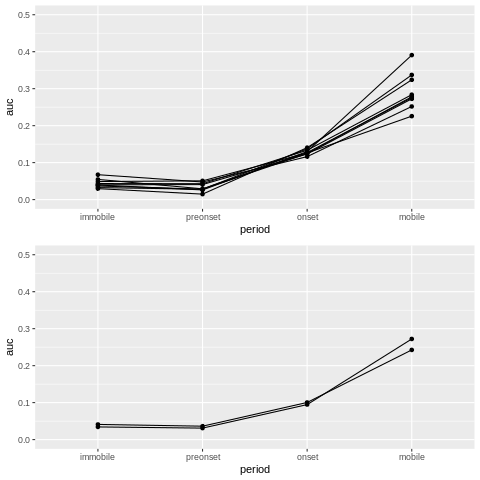

In [ ]:
%%R
p1 <- ggplot(gcamp, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(0,0.5)
p2 <- ggplot(eyfp, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(0,0.5)
multiplot(p1,p2)

Normality test

In [ ]:
%%R
print("---------------- GCaMP ---------------")
print(c("immobile", shapiro.test(gcamp[(gcamp$period=="immobile"), ]$auc)$p.value))
print(c("preonset", shapiro.test(gcamp[(gcamp$period=="preonset"),]$auc)$p.value))
print(c("onset", shapiro.test(gcamp[(gcamp$period=="onset"),]$auc)$p.value))
print(c("mobile", shapiro.test(gcamp[(gcamp$period=="mobile"),]$auc)$p.value))

[1] "---------------- GCaMP ---------------"
[1] "immobile"         "0.50472301470075"
[1] "preonset"          "0.522024945842807"
[1] "onset"             "0.958597838651246"
[1] "mobile"            "0.531592499349234"


$p>0.5$

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
gcamp["group"] = "GCaMP"
eyfp["group"] = "eYFP"
df <- rbind(gcamp,eyfp)
anova <- aov(auc ~ group*period, random=~1|mouse, data=df)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
group         1 0.0022 0.00222   3.489 0.0699 .  
period        3 0.4529 0.15098 237.544 <2e-16 ***
group:period  3 0.0015 0.00051   0.810 0.4967    
Residuals    36 0.0229 0.00064                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=gcamp)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = gcamp, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0 -0.009382   0.012469  -0.752    0.793    
onset - immobile == 0     0.085161   0.012469   6.830   <1e-05 ***
mobile - immobile == 0    0.249654   0.012469  20.022   <1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



In [ ]:
#eYFP
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=eyfp)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = eyfp, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0     -1.0        1.0    -1.0   0.6243    
onset - immobile == 0         2.5        1.0     2.5   0.0335 *  
mobile - immobile == 0        4.5        1.0     4.5   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# APT & SCT w/movement, OFT & TST mobility offset FigSupp2

## APT w/movement FigSupp2A

In [23]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "APTmove")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [24]:
%%R
neworder <- c('baseline','airpuff','offset')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','airpuff','offset'))

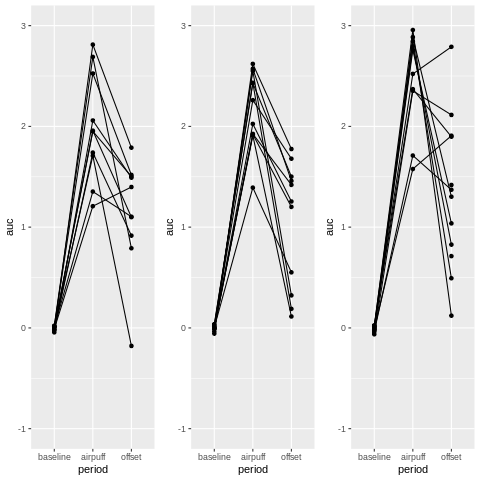

In [25]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,3)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,3)
p3 <- ggplot(df[(df$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,3)
multiplot(p1,p2,p3, cols=3)

Normality test

In [26]:
%%R
print(c("LHA-DRN baseline", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="baseline"), ]$auc)$p.value))
print(c("LHA-DRN airpuff", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="airpuff"),]$auc)$p.value))
print(c("LHA-DRN offset", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="offset"),]$auc)$p.value))

print(c("LHA-VTA baseline", shapiro.test(df[(df$output=="LHA-VTA" & df$period=="baseline"),]$auc)$p.value))
print(c("LHA-VTA airpuff", shapiro.test(df[(df$output=="LHA-VTA" & df$period=="airpuff"),]$auc)$p.value))
print(c("LHA-VTA offset", shapiro.test(df[(df$output=="LHA-VTA" & df$period=="offset"),]$auc)$p.value))

print(c("LHA-LHb baseline", shapiro.test(df[(df$output=="LHA-LHb" & df$period=="baseline"),]$auc)$p.value))
print(c("LHA-LHb airpuff", shapiro.test(df[(df$output=="LHA-LHb" & df$period=="airpuff"),]$auc)$p.value))
print(c("LHA-LHb offset", shapiro.test(df[(df$output=="LHA-LHb" & df$period=="offset"),]$auc)$p.value))

[1] "LHA-DRN baseline"  "0.266651755691991"
[1] "LHA-DRN airpuff"  "0.63507136793239"
[1] "LHA-DRN offset"     "0.0813442507061975"
[1] "LHA-VTA baseline"  "0.618424068341843"
[1] "LHA-VTA airpuff"  "0.19720962455368"
[1] "LHA-VTA offset"     "0.0708614564696827"
[1] "LHA-LHb baseline"  "0.525736192856283"
[1] "LHA-LHb airpuff"    "0.0543374018515066"
[1] "LHA-LHb offset"   "0.99365829475209"


$p > 0.5$

Repeated measures ANOVA with Dunnett poshoc analysis

In [27]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value Pr(>F)    
output         2   1.33    0.67   3.024 0.0536 .  
period         2  85.57   42.79 193.901 <2e-16 ***
output:period  4   1.13    0.28   1.279 0.2843    
Residuals     90  19.86    0.22                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = df[df$output=='LHA-LHb',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   2.0020     0.1866  10.730  < 1e-10 ***
offset - baseline == 0    1.1447     0.1866   6.136  1.7e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   2.1879     0.1704  12.841  < 1e-10 ***
offset - baseline == 0    1.0452     0.1704   6.

### Mobile score

In [29]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "APTmove_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [30]:
%%R
neworder <- c('baseline','airpuff','offset')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','airpuff','offset'))

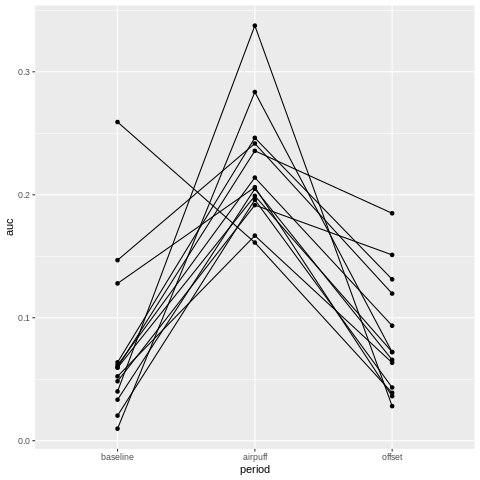

In [31]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))


Normality test

In [32]:
%%R
print(c("baseline", shapiro.test(df[(df$period=="baseline"), ]$auc)$p.value))
print(c("airpuff", shapiro.test(df[(df$period=="airpuff"),]$auc)$p.value))
print(c("offset", shapiro.test(df[(df$period=="offset"),]$auc)$p.value))

[1] "baseline"            "0.00323167507526172"
[1] "airpuff"           "0.172576930209729"
[1] "offset"            "0.210056897886015"


Repeated measures ANOVA with Dunnett poshoc analysis

In [33]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
period       2 0.1748 0.08738   28.52 3.78e-08 ***
Residuals   36 0.1103 0.00306                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [34]:
# GCaMP
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = df, random = ~1 | mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0 0.146325   0.021711   6.740   <1e-10 ***
offset - baseline == 0  0.009084   0.021711   0.418    0.881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



## SCT w/movement FigSupp2B

### Onset

In [ ]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "SCTon")
df$output = as.character(df$output)
df$period = as.character(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('baseline','onset','drinking')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','onset','drinking'))

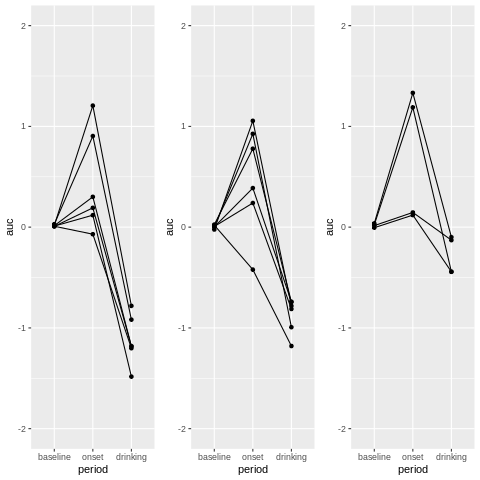

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2,2)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2,2)
p3 <- ggplot(df[(df$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2,2)
multiplot(p1,p2,p3, cols=3)

Normality test

In [ ]:
%%R
print(c("LHA-DRN baseline", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="baseline"), ]$auc)$p.value))
print(c("LHA-DRN onset", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="onset"),]$auc)$p.value))
print(c("LHA-DRN drinking", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="drinking"),]$auc)$p.value))

print(c("LHA-VTA baseline", shapiro.test(df[(df$output=="LHA-VTA" & df$period=="baseline"),]$auc)$p.value))
print(c("LHA-VTA onset", shapiro.test(df[(df$output=="LHA-VTA" & df$period=="onset"),]$auc)$p.value))
print(c("LHA-VTA drinking", shapiro.test(df[(df$output=="LHA-VTA" & df$period=="drinking"),]$auc)$p.value))

print(c("LHA-LHb baseline", shapiro.test(df[(df$output=="LHA-LHb" & df$period=="baseline"),]$auc)$p.value))
print(c("LHA-LHb onset", shapiro.test(df[(df$output=="LHA-LHb" & df$period=="onset"),]$auc)$p.value))
print(c("LHA-LHb drinking", shapiro.test(df[(df$output=="LHA-LHb" & df$period=="drinking"),]$auc)$p.value))

[1] "LHA-DRN baseline"  "0.150771882661804"
[1] "LHA-DRN onset"     "0.294239443183091"
[1] "LHA-DRN drinking"  "0.621669520593991"
[1] "LHA-VTA baseline"  "0.562950847064618"
[1] "LHA-VTA onset"     "0.542579914532667"
[1] "LHA-VTA drinking"   "0.0774399529154861"
[1] "LHA-LHb baseline"  "0.932192625989838"
[1] "LHA-LHb onset"      "0.0863020597472067"
[1] "LHA-LHb drinking"   "0.0547621471731335"


$p > 0.5$

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         2  1.003   0.501   4.259   0.0212 *  
period         2 14.735   7.368  62.569 6.75e-13 ***
output:period  4  0.911   0.228   1.933   0.1242    
Residuals     39  4.592   0.118                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = df[df$output=='LHA-LHb',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0      0.4274     0.1486   2.877  0.00776 ** 
drinking - baseline == 0  -1.1393     0.1486  -7.669  < 1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0      0.4892     0.1761   2.778   0.0105 *  
drinking - baseline == 0  -0.8799     0.176

### Onset Mobile score

In [ ]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "SCTon_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('baseline','onset','drinking')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','onset','drinking'))

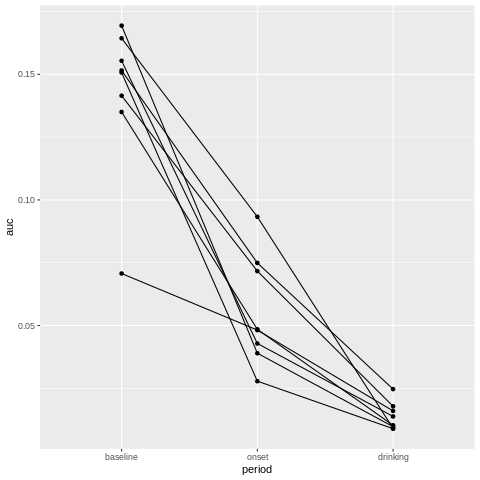

In [ ]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))

Normality test

In [ ]:
%%R
print(c("baseline", shapiro.test(df[(df$period=="baseline"), ]$auc)$p.value))
print(c("onset", shapiro.test(df[(df$period=="onset"),]$auc)$p.value))
print(c("drinking", shapiro.test(df[(df$period=="drinking"),]$auc)$p.value))

[1] "baseline"           "0.0103485060319971"
[1] "onset"             "0.539541571935371"
[1] "drinking"          "0.126505732429882"


Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
period       2 0.06873 0.03436      70 5.15e-10 ***
Residuals   21 0.01031 0.00049                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = df, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0    -0.08655    0.01067  -8.111   <1e-10 ***
drinking - baseline == 0 -0.12853    0.01067 -12.046   <1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



### Offset

In [ ]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "SCToff")
df$output = as.character(df$output)
df$period = as.character(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('drinking','offset')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('drinking','offset'))

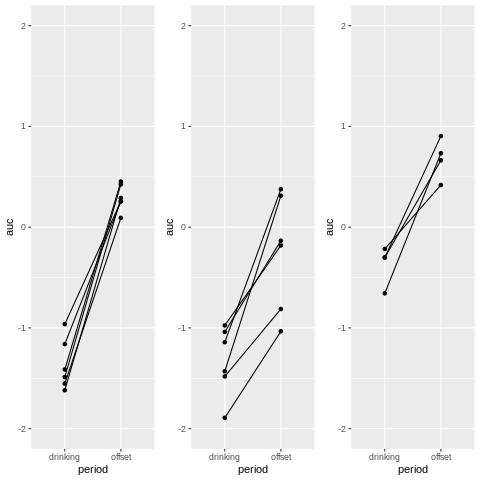

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2,2)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2,2)
p3 <- ggplot(df[(df$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2,2)
multiplot(p1,p2,p3, cols=3)

Normality test

In [ ]:
%%R
print(c("LHA-DRN drinking", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="drinking"),]$auc)$p.value))
print(c("LHA-DRN offset", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="offset"),]$auc)$p.value))

print(c("LHA-VTA drinking", shapiro.test(df[(df$output=="LHA-VTA" & df$period=="drinking"),]$auc)$p.value))
print(c("LHA-VTA offset", shapiro.test(df[(df$output=="LHA-VTA" & df$period=="offset"),]$auc)$p.value))

print(c("LHA-LHb drinking", shapiro.test(df[(df$output=="LHA-LHb" & df$period=="drinking"),]$auc)$p.value))
print(c("LHA-LHb offset", shapiro.test(df[(df$output=="LHA-LHb" & df$period=="offset"),]$auc)$p.value))

[1] "LHA-DRN drinking"  "0.400568158399199"
[1] "LHA-DRN offset"    "0.561192561859676"
[1] "LHA-VTA drinking"  "0.494482624525077"
[1] "LHA-VTA offset"    "0.423590294060179"
[1] "LHA-LHb drinking"   "0.0927470564997225"
[1] "LHA-LHb offset"    "0.902492349725199"


$p > 0.5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         2  4.373   2.187  19.636 6.36e-06 ***
period         1 13.320  13.320 119.610 3.18e-11 ***
output:period  2  0.661   0.330   2.966   0.0691 .  
Residuals     26  2.895   0.111                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = df[df$output=='LHA-LHb',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
offset - drinking == 0   1.6610     0.1164   14.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
offset - drinking == 0   1.0809     0.1789   6.043 1.51e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

### Offset Mobile score

In [ ]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "SCToff_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('drinking','offset')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('drinking','offset'))

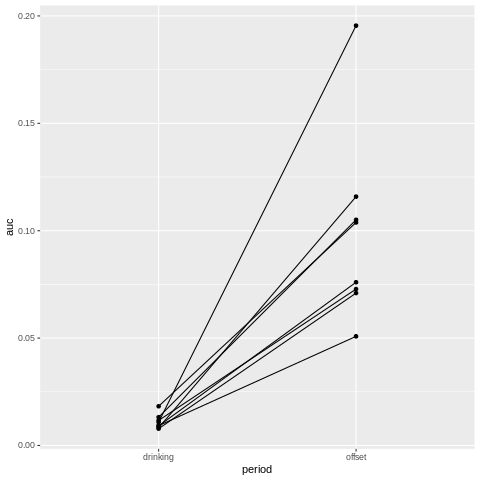

In [ ]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))

Normality test

In [ ]:
%%R
print(c("drinking", shapiro.test(df[(df$period=="drinking"),]$auc)$p.value))
print(c("offset", shapiro.test(df[(df$period=="offset"),]$auc)$p.value))

[1] "drinking"          "0.120395249377124"
[1] "offset"             "0.0941301257242016"


Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df  Sum Sq  Mean Sq F value   Pr(>F)    
period       1 0.03085 0.030854   30.73 7.24e-05 ***
Residuals   14 0.01406 0.001004                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = df, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
offset - drinking == 0  0.08783    0.01563   5.618 1.93e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



## OFT mobility offset FigSupp2C

In [ ]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "OFToff")
df$output = as.character(df$output)
df$period = as.character(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('mobile','immobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('mobile','immobile'))

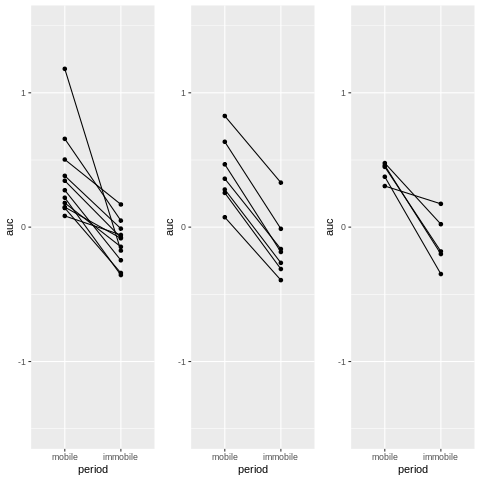

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
p3 <- ggplot(df[(df$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
multiplot(p1,p2,p3, cols=3)

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         2 0.0040  0.0020   0.037    0.964    
period         1 3.0737  3.0737  56.302 3.77e-09 ***
output:period  2 0.0097  0.0048   0.089    0.915    
Residuals     40 2.1837  0.0546                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = df[df$output=='LHA-LHb',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
immobile - mobile == 0 -0.49005    0.09631  -5.088 3.61e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
immobile - mobile == 0 -0.55718    0.02684  -20.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

### Mobile score

In [15]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "OFToff_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [16]:
%%R
neworder <- c('mobile','immobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('mobile','immobile'))

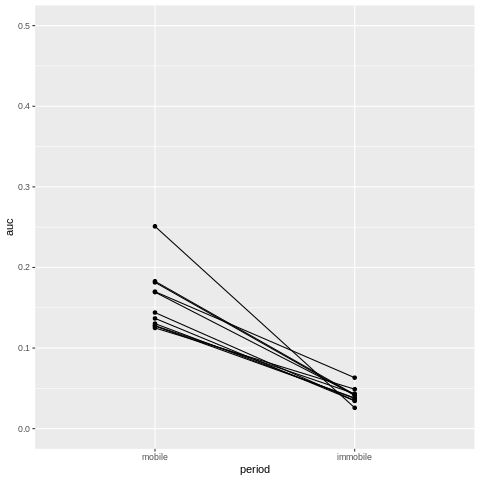

In [17]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(0,0.5)

Repeated measures ANOVA with Dunnett poshoc analysis

In [18]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
period       1 0.07609 0.07609    99.2 3.38e-09 ***
Residuals   20 0.01534 0.00077                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = df, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
immobile - mobile == 0 -0.11762    0.01181   -9.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



## TST mobility offset FigSupp2D

In [ ]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "TSToff")
df$output = as.character(df$output)
df$period = as.character(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('mobile','immobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('mobile','immobile'))

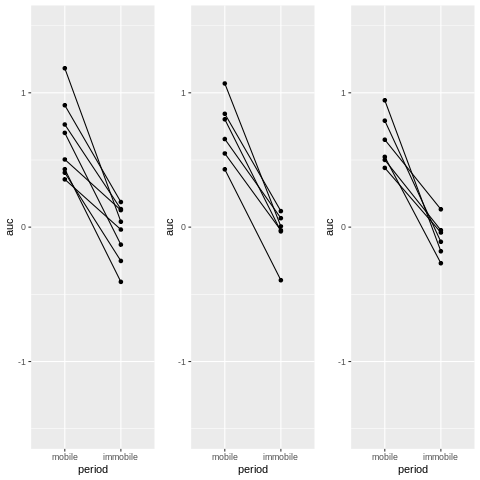

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
p3 <- ggplot(df[(df$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
multiplot(p1,p2,p3, cols=3)

Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         2  0.022   0.011   0.235    0.792    
period         1  5.271   5.271 112.210 2.61e-12 ***
output:period  2  0.009   0.004   0.095    0.910    
Residuals     34  1.597   0.047                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = df[df$output=='LHA-LHb',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
immobile - mobile == 0 -0.69631    0.08963  -7.768 7.99e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = vta, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
immobile - mobile == 0 -0.76833    0.07469  -10.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

### Mobile score

In [19]:
%%R
df <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet = "TSToff_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [20]:
%%R
neworder <- c('mobile','immobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('mobile','immobile'))

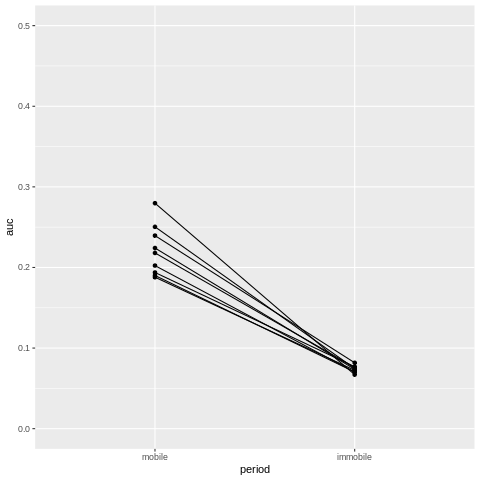

In [21]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(0,0.5)

Repeated measures ANOVA with Dunnett poshoc analysis

In [22]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
period       1 0.09725 0.09725   195.2 2.21e-10 ***
Residuals   16 0.00797 0.00050                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = df, random = ~1 | mouse)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
immobile - mobile == 0 -0.14700    0.01052  -13.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# Outputs correlation FigSupp3

In [ ]:
%%R
install.packages("maptools", repos = "https://cloud.r-project.org")
install.packages("car", repos = "https://cloud.r-project.org")
install.packages("cowplot", repos = "https://cloud.r-project.org")
install.packages("rstatix", repos = "https://cloud.r-project.org")

In [ ]:
%%R
library("maptools")
library("car")
library("cowplot")
library("rstatix")

In [ ]:
%%R
gcamp <- read_excel("fig1_LH_apt-sct-oft-tst.xlsx", sheet="outputCorrelation")
gcamp$group = "GCaMP"
gcamp$group = as.factor(gcamp$group)
gcamp$test = as.factor(gcamp$test)
gcamp$output = as.factor(gcamp$output)
gcamp$R = as.numeric(gcamp$R)

In [ ]:
%%R
eyfp <- read_excel("fig1-supp1_LH-eYFP.xlsx", sheet="outputCorrelation")
eyfp$group = "eYFP"
eyfp$test = as.factor(eyfp$test)
eyfp$output = as.factor(eyfp$output)
eyfp$R = as.numeric(eyfp$R)

In [ ]:
%%R
df <- rbind(gcamp,eyfp)

Normality

In [ ]:
%%R
df %>%
  group_by(group,test) %>%
  shapiro_test(R)

# A tibble: 8 x 5
  test  group variable statistic      p
  <fct> <fct> <chr>        <dbl>  <dbl>
1 APT   GCaMP R            0.966 0.676 
2 OFT   GCaMP R            0.940 0.453 
3 SCT   GCaMP R            0.960 0.435 
4 TST   GCaMP R            0.893 0.0905
5 APT   eYFP  R            0.830 0.107 
6 OFT   eYFP  R            0.901 0.379 
7 SCT   eYFP  R            0.860 0.190 
8 TST   eYFP  R            0.796 0.0537


Compare to 0

In [ ]:
%%R
ttest <- df %>%
  group_by(group,test,output) %>%
  t_test(R ~ 0) %>%
  select(-.y.,-statistic,-df)
print(ttest,n=24)

# A tibble: 24 x 7
   test  output  group group1 group2         n            p
   <fct> <fct>   <fct> <chr>  <chr>      <int>        <dbl>
 1 APT   DRN.LHb GCaMP 1      null model     8 0.000015    
 2 APT   DRN.VTA GCaMP 1      null model     8 0.000000656 
 3 APT   VTA.LHb GCaMP 1      null model     4 0.0108      
 4 OFT   DRN.LHb GCaMP 1      null model     4 0.00139     
 5 OFT   DRN.VTA GCaMP 1      null model     7 0.000037    
 6 OFT   VTA.LHb GCaMP 1      null model     2 0.0111      
 7 SCT   DRN.LHb GCaMP 1      null model    10 0.00000684  
 8 SCT   DRN.VTA GCaMP 1      null model    10 0.0000000309
 9 SCT   VTA.LHb GCaMP 1      null model     4 0.000462    
10 TST   DRN.LHb GCaMP 1      null model     5 0.000066    
11 TST   DRN.VTA GCaMP 1      null model     6 0.0000134   
12 TST   VTA.LHb GCaMP 1      null model     3 0.00906     
13 APT   DRN.LHb eYFP  1      null model     2 0.253       
14 APT   DRN.VTA eYFP  1      null model     2 0.323       
15 APT   VTA.LHb eYFP

Difference between groups

In [ ]:
%%R
res.aov <- anova_test(data=df, dv=R, wid=mouse, between=group, within=c(test,output))
get_anova_table(res.aov)

ANOVA Table (type III tests)

             Effect DFn DFd      F     p p<.05   ges
1             group   1   2 14.362 0.063       0.750
2              test   3   6  0.181 0.905       0.033
3            output   2   4 12.800 0.018     * 0.220
4        group:test   3   6  2.636 0.144       0.330
5      group:output   2   4  0.881 0.482       0.019
6       test:output   6  12  2.325 0.101       0.161
7 group:test:output   6  12  1.413 0.287       0.104


Compute simple simple comparisons

In [ ]:
%%R
pwc <- df %>%
  group_by(test,output) %>%
  tukey_hsd(R ~ group, p.adjust.method = "bonferroni") %>%
  select(-null.value,-estimate) # Remove details
pwc

# A tibble: 12 x 9
   test  output  term  group1 group2 conf.low conf.high    p.adj p.adj.signif
   <fct> <fct>   <chr> <chr>  <chr>     <dbl>     <dbl>    <dbl> <chr>       
 1 APT   DRN.LHb group GCaMP  eYFP     -0.817   -0.343  0.000482 ***         
 2 APT   DRN.VTA group GCaMP  eYFP     -0.624   -0.124  0.00866  **          
 3 APT   VTA.LHb group GCaMP  eYFP     -0.763   -0.0846 0.0256   *           
 4 OFT   DRN.LHb group GCaMP  eYFP     -0.519   -0.176  0.00496  **          
 5 OFT   DRN.VTA group GCaMP  eYFP     -0.626   -0.120  0.0102   *           
 6 OFT   VTA.LHb group GCaMP  eYFP     -0.857    0.0939 0.0746   ns          
 7 SCT   DRN.LHb group GCaMP  eYFP     -0.572    0.205  0.316    ns          
 8 SCT   DRN.VTA group GCaMP  eYFP     -0.739   -0.109  0.0134   *           
 9 SCT   VTA.LHb group GCaMP  eYFP     -0.426    0.268  0.561    ns          
10 TST   DRN.LHb group GCaMP  eYFP     -0.819   -0.476  0.000199 ***         
11 TST   DRN.VTA group GCaMP  eYFP     -0.896

In [ ]:
%%R
pwc <- df %>%
  group_by(group,output) %>%
  tukey_hsd(R ~ test, paired=TRUE, p.adjust.method = "bonferroni") %>%
  select(-null.value,-estimate) # Remove details
print(pwc,n=36)

# A tibble: 36 x 9
   output  group term  group1 group2 conf.low conf.high   p.adj p.adj.signif
   <fct>   <fct> <chr> <chr>  <chr>     <dbl>     <dbl>   <dbl> <chr>       
 1 DRN.LHb GCaMP test  APT    OFT     -0.264     0.163  0.912   ns          
 2 DRN.LHb GCaMP test  APT    SCT     -0.266     0.0644 0.352   ns          
 3 DRN.LHb GCaMP test  APT    TST     -0.0338    0.364  0.128   ns          
 4 DRN.LHb GCaMP test  OFT    SCT     -0.257     0.156  0.905   ns          
 5 DRN.LHb GCaMP test  OFT    TST     -0.0183    0.449  0.0782  ns          
 6 DRN.LHb GCaMP test  SCT    TST      0.0750    0.457  0.00418 **          
 7 DRN.VTA GCaMP test  APT    OFT     -0.268     0.0809 0.471   ns          
 8 DRN.VTA GCaMP test  APT    SCT     -0.173     0.147  0.996   ns          
 9 DRN.VTA GCaMP test  APT    TST     -0.106     0.258  0.671   ns          
10 DRN.VTA GCaMP test  OFT    SCT     -0.0853    0.247  0.552   ns          
11 DRN.VTA GCaMP test  OFT    TST     -0.0184    0.356  0

In [ ]:
%%R
pwc <- df %>%
  group_by(group,test) %>%
  tukey_hsd(R ~ output, paired=TRUE, p.adjust.method = "bonferroni") %>%
  select(-null.value,-estimate) # Remove details
print(pwc,n=24)

# A tibble: 24 x 9
   test  group term   group1  group2  conf.low conf.high   p.adj p.adj.signif
   <fct> <fct> <chr>  <chr>   <chr>      <dbl>     <dbl>   <dbl> <chr>       
 1 APT   GCaMP output DRN.LHb DRN.VTA -0.00501    0.335  0.0579  ns          
 2 APT   GCaMP output DRN.LHb VTA.LHb -0.280      0.137  0.659   ns          
 3 APT   GCaMP output DRN.VTA VTA.LHb -0.445     -0.0283 0.0249  *           
 4 OFT   GCaMP output DRN.LHb DRN.VTA -0.0836     0.328  0.279   ns          
 5 OFT   GCaMP output DRN.LHb VTA.LHb -0.0838     0.485  0.18    ns          
 6 OFT   GCaMP output DRN.VTA VTA.LHb -0.185      0.342  0.702   ns          
 7 SCT   GCaMP output DRN.LHb DRN.VTA  0.114      0.393  0.00046 ***         
 8 SCT   GCaMP output DRN.LHb VTA.LHb -0.162      0.207  0.95    ns          
 9 SCT   GCaMP output DRN.VTA VTA.LHb -0.416     -0.0465 0.0127  *           
10 TST   GCaMP output DRN.LHb DRN.VTA -0.0965     0.248  0.484   ns          
11 TST   GCaMP output DRN.LHb VTA.LHb -0.144 

# Functions

In [4]:
%%R
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}